In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os,sys

In [7]:
closed = pd.read_csv("ClosedAverage.csv", \
            names=['time', 'resp', 'proxy', 'router', 'originA', 'originB'])
print("closed has", len(closed.index), "rows")
closed[:5]

closed has 9957 rows


,time,resp,proxy,router,originA,originB
0,10.036511,0.166524,0.637821,0.155142,0.924056,0.749871
1,20.075607,0.178683,0.614420,0.137205,0.981474,0.679607
2,30.141002,0.255604,0.620062,0.136784,0.980300,0.691470
3,40.216904,0.236859,0.595849,0.130627,0.986105,0.630321
4,50.229666,0.205837,0.577142,0.127432,0.989218,0.612193


In [8]:
closed[9900:9905]

,time,resp,proxy,router,originA,originB
9900,99439.909293,0.213893,0.568720,0.131192,0.984616,0.656018
9901,99449.946263,0.264462,0.568718,0.131192,0.984618,0.656012
9902,99459.954034,0.243375,0.568715,0.131192,0.984619,0.656008
9903,99469.982108,0.191640,0.568709,0.131190,0.984621,0.655995
9904,99479.994366,0.205872,0.568708,0.131188,0.984623,0.655983


Now, lets plot the response time and the utilization for one component

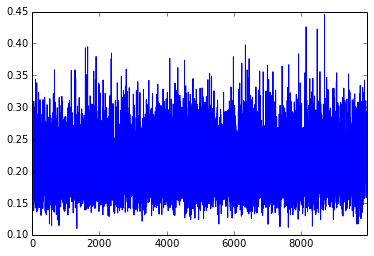

In [9]:
closed['resp'].plot()

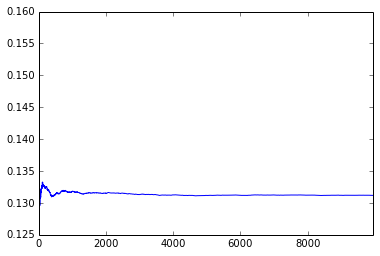

In [10]:
closed['router'].plot()

It's clear there's a transient for the first ~40,000 seconds (recall that we're looking at the data divided into 10 second averages)

In [28]:
# Run for long time 
# N observations
# Divide up into batches
# m batches size n each so m = N/n
# Compute batch mean (xi)
# Compute var of batch means as function of batch size (X is overall mean)
# Var(x) = (1/(m-1))(xi-X)2
# Plot variance versus size n
# When n starts decreasing, have transient

#closedAll = pd.read_csv("OmnetClosed.csv", \
#            names=['time', 'resp', 'proxy', 'router', 'originA', 'originB'])

#total_rows = len(closedAll.index)
#print("Total observations = ", total_rows)
import numpy as np
from numpy import mean

total_rows = len(closed.index)
print("Total observations = ", total_rows)

# m batches size n each so m = N/n
batch_size = int((total_rows**(0.5)))
print("Batch size = ", batch_size)

batch_means = []
variance = []
overall_mean = mean(closed['resp'])

for ii in range(0,total_rows,batch_size):
    #print(i)
    m_temp = mean(closed['resp'][ii:99+ii])
    batch_means.append(m_temp)

#print(batch_means)
    

for jj in range(0,len(batch_means)):
    var = (1/(batch_size-1))
    variance.append(var)



    

Total observations =  9957
Batch size =  99
[0.20634523345954542, 0.21376052987943422, 0.20502804778060599, 0.21246032328502013, 0.20584922298271713, 0.20448452977584858, 0.20620477506359597, 0.20706785401949498, 0.2153153860760405, 0.20863541782108092, 0.20825563663811114, 0.21280931747670703, 0.20599780319806063, 0.2109109857786868, 0.21181390285717169, 0.21396542534980806, 0.21197563924536361, 0.216316978202303, 0.21105705755250503, 0.21216353195881826, 0.2099748878909293, 0.21769312961849493, 0.20708618012891919, 0.21668221054594944, 0.20127508693963628, 0.21065409952127276, 0.2131918874179293, 0.21226632340379797, 0.2158939921370808, 0.2088050923232424, 0.20812756265391916, 0.21399451710365661, 0.20735823782928292, 0.20503608686565661, 0.21233491398007073, 0.21409230940862625, 0.20345781490348477, 0.20931497974796967, 0.20599842390537368, 0.21404750969741421, 0.21344346217239402, 0.21133506783785869, 0.20793887140399991, 0.21624665245336355, 0.21377167240932313, 0.2108225542554242

In [52]:
import scipy
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    # return [m, [m-h, m+h]]
    return [m, h]

In [53]:
#Problem 2
#Report last 5 measurements:
#49999.897656465426,0.039093270671,0.577865,0.133549,0.999779,0.667094
#49999.929923779502,0.461592592368,0.577865,0.133549,0.999778,0.667094
#49999.949150078496,0.068900355486,0.577866,0.133549,0.999781,0.667096
#49999.976601088507,0.005503812923,0.577865,0.133549,0.999781,0.667095
#49999.994374383683,0.349631026105,0.577865,0.133549,0.99978,0.667095

import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt

print("Last 5 measurements: ")
print('time', 'resp', 'proxy', 'router', 'originA', 'originB')
print('''49999.897656465426,0.039093270671,0.577865,0.133549,0.999779,0.667094
49999.929923779502,0.461592592368,0.577865,0.133549,0.999778,0.667094
49999.949150078496,0.068900355486,0.577866,0.133549,0.999781,0.667096
49999.976601088507,0.005503812923,0.577865,0.133549,0.999781,0.667095
49999.994374383683,0.349631026105,0.577865,0.133549,0.99978,0.667095''')

#Using R (or some other tool), make a plot of the response time as a function of the number of jobs in the system.
#I'm averaging the last 10000 response times
avg_response = []
response_confint = []
for ii in range(26,37):
    file = "OmnetClosed" + str(ii) + ".csv"
    TehCSV = pd.read_csv(file, \
            names=['time', 'resp', 'proxy', 'router', 'originA', 'originB'])
    last_N = TehCSV['resp'][-10000:]
    #res[0]=mean, 1=confint
    res = mean_confidence_interval(last_N)
    avg_response.append(res[0])
    response_confint.append(res[1])
    
print("Avg response = ", avg_response)
print("Confint = ", response_confint)


Last 5 measurements: 
time resp proxy router originA originB
49999.897656465426,0.039093270671,0.577865,0.133549,0.999779,0.667094
49999.929923779502,0.461592592368,0.577865,0.133549,0.999778,0.667094
49999.949150078496,0.068900355486,0.577866,0.133549,0.999781,0.667096
49999.976601088507,0.005503812923,0.577865,0.133549,0.999781,0.667095
49999.994374383683,0.349631026105,0.577865,0.133549,0.99978,0.667095
Avg response =  [0.3060261525690342, 0.34665668271691735, 0.40241130085256216, 0.36370661170851487, 0.416365659768348, 0.4508458641355258, 0.45878959455981722, 0.46910008926055424, 0.46158370373079971, 0.51374538532054048, 0.61510113089376028]
Confint =  [0.011729182397462979, 0.013357357375828098, 0.015698035589229404, 0.014447759446995639, 0.016466558488056053, 0.018027323337851387, 0.018585328611868592, 0.019372190655263948, 0.019149478225205088, 0.021032860772764662, 0.024803480038475639]


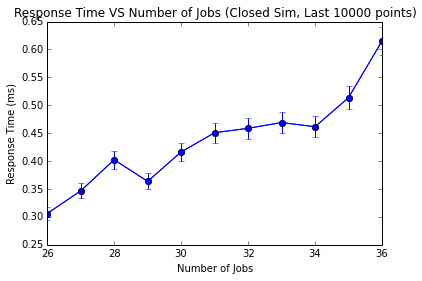

95% confidence intervals or last 10000 points shown on plot


In [56]:
x = []
for jj in range(26,37):
    x.append(jj)
line0, = plt.plot(x, avg_response, 'bo-')
plt.errorbar(x, avg_response, 
  yerr=response_confint, fmt='bo-')

#title and axis labels
plt.xlabel('Number of Jobs')
plt.ylabel('Response Time (ms)')
plt.title("Response Time VS Number of Jobs (Closed Sim, Last 10000 points)")
#plt.xscale('log', basex=2)
#plt.yscale('log', basey=2)
# plt.xscale('log')
# plt.yscale('log')
# plt.xticks([1,4,9,16,25,36,49,64,100,144], [1,4,9,16,25,36,49,64,100,144])
# plt.xticklabels([1,4,9,16,25,36,49,64,81,100,121,144])
#legend
#plt.legend([line0, line1, line2], 
#  ['OpenMP', 'Hybrid', 'MPI'], loc=1)
plt.show()
print("95% confidence intervals or last 10000 points shown on plot")

In [58]:
#Problem 3
print("15 ms interarrivaltime gets very close to 1, here are the last 5 measurements:")
print('''49999.885753074046,0.014867338833,0.833873,0.183423,0.999982,0.99984
49999.90796650579,0.024744846576,0.833873,0.183422,0.999981,0.99984
49999.931279015363,60.418726752998,0.833873,0.183422,0.99998,0.999839
49999.934273498183,0.03122815644,0.833873,0.183422,0.99998,0.999839
49999.98892562328,0.006565631384,0.833872,0.183422,0.999983,0.99984
''')

15 ms interarrivaltime gets very close to 1, here are the last 5 measurements:
49999.885753074046,0.014867338833,0.833873,0.183423,0.999982,0.99984
49999.90796650579,0.024744846576,0.833873,0.183422,0.999981,0.99984
49999.931279015363,60.418726752998,0.833873,0.183422,0.99998,0.999839
49999.934273498183,0.03122815644,0.833873,0.183422,0.99998,0.999839
49999.98892562328,0.006565631384,0.833872,0.183422,0.999983,0.99984



In [68]:
#Problem 4

avg_response_4 = []
proxy = []
router = []
originA = []
originB = []
for ii in range(0,14):
    if ii<14:
        file = "OmnetOpen" + str(ii+10) + "_" + str(ii*2+70) + ".csv"
        print(file)
        TehCSV = pd.read_csv(file, \
                names=['time', 'resp', 'proxy', 'router', 'originA', 'originB'])
        avg_response_4.append(mean(TehCSV['resp'][-10000:]))
        proxy.append(mean(TehCSV['proxy'][-10000:]))
        router.append(mean(TehCSV['router'][-10000:]))
        originA.append(mean(TehCSV['originA'][-10000:]))
        originB.append(mean(TehCSV['originB'][-10000:]))



OmnetOpen10_70.csv
OmnetOpen11_72.csv
OmnetOpen12_74.csv
OmnetOpen13_76.csv
OmnetOpen14_78.csv
OmnetOpen15_80.csv
OmnetOpen16_82.csv
OmnetOpen17_84.csv
OmnetOpen18_86.csv
OmnetOpen19_88.csv
OmnetOpen20_90.csv
OmnetOpen21_92.csv
OmnetOpen22_94.csv
OmnetOpen23_96.csv


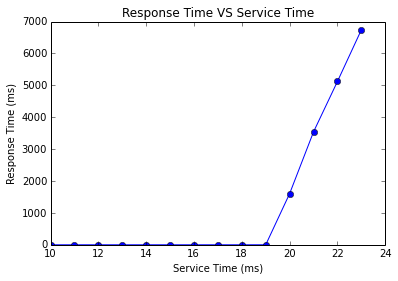

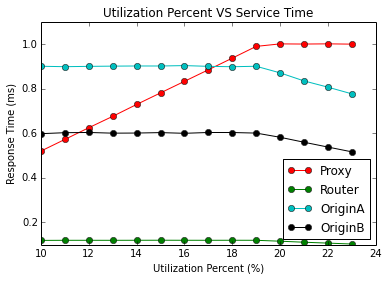

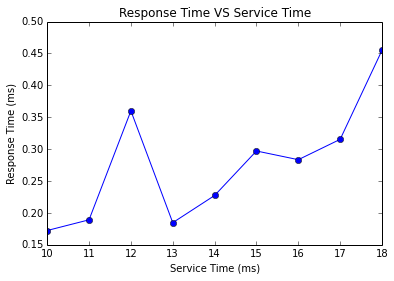

In [80]:

x = []
for jj in range(0,14):
    if ii<24:
        x.append(jj+10)
        
#print(len(x), len(proxy))
#print(x)
#print(avg_response_4)
        
line0, = plt.plot(x, avg_response_4, 'bo-')
plt.xlabel('Service Time (ms)')
plt.ylabel('Response Time (ms)')
plt.title("Response Time VS Service Time")
plt.show()

line1, = plt.plot(x, proxy, 'ro-')
line2, = plt.plot(x, router, 'go-')
line3, = plt.plot(x, originA, 'co-')
line4, = plt.plot(x, originB, 'ko-')
plt.legend([line1, line2, line3, line4], 
  ['Proxy', 'Router', 'OriginA', 'OriginB'], loc=4)
plt.xlabel('Utilization Percent (%)')
plt.ylabel('Response Time (ms)')
plt.title("Utilization Percent VS Service Time")
plt.show()

line0, = plt.plot(x[0:9], avg_response_4[0:9], 'bo-')
plt.xlabel('Service Time (ms)')
plt.ylabel('Response Time (ms)')
plt.title("Response Time VS Service Time")
plt.show()



